# Tarea 1


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión Lineal

In [3]:
data = np.genfromtxt('data_out.txt', delimiter=' ')
x = data[:,0]
y = data[:,1]

### A continuación se grafica la data:

Text(0,0.5,'Y')

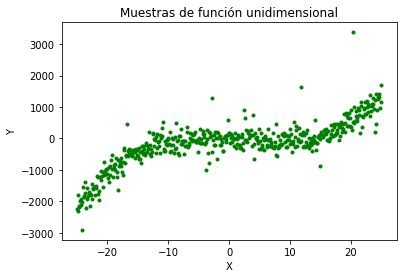

In [4]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.plot(x,y, 'g.')
plt.title("Muestras de función unidimensional")
plt.xlabel("X")
plt.ylabel("Y")

### Regresión lineal

Sabemos que para la regresión lineal regularizada, los parámetros $\theta$ (parámetros del modelo) tienen la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Para simplificar el problema usaremos un parámetro de regularización $\rho = 0$

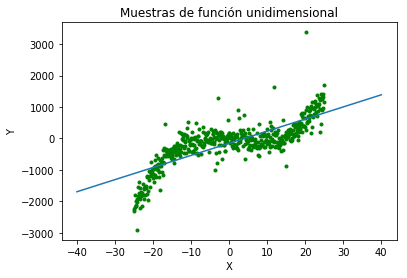

In [7]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

x_recta = np.linspace(-40, 40, 10)
plt.figure()
plt.plot(x,y, 'g.')
plt.title("Muestras de función unidimensional")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    x_recta,
    recta(x_recta, rho))

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [6]:
print("Theta polyfit: ", np.polyfit(x,y, 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [-0.12316272 30.97867776]
Theta formula:  [-0.12316272 30.97867776]


# P3 Proyecto curso

Mi propuesta es estudiar de forma teórica y práctica el problema de clasificación de textos según tópicos. Este problema lo estoy viendo en un proyecto de otro ramo en el cual se usan herramientas de teoría de la información y me interesa complementar dichas herramientas con los conceptos vistos en este curso. El problema a resolver se explica con el siguiente ejemplo: 
"Se tienen diversos conjuntos de textos, por ejemplo artículos sobre matemáticas, física y biología, y un texto que sabemos que pertenece a uno de estos conjuntos pero no a cuál. El problema consiste en determinar el conjunto al que el texto pertenece."
Dada la descripción, en primera instancia es un problema de aprendizaje supervisado.
